In [102]:
# import tool set
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [103]:
# Get data from Excel
df = pd.read_excel('/Users/arnet/Desktop/Ironhack/Week5_Project/regression_data.xls')

In [104]:
df

In [106]:
# Get information about the columns
df.info()

In [107]:
# Get an overview of column values
for column in df:
    print(column.upper())
    print(df[column].value_counts())
    print()

'for column in df:\n    print(column.upper())\n    print(df[column].value_counts())\n    print()'

## Identify outliers

By plotting the coordinates of the properties on a map (via Tableau), it was discovered that a number of properties lie hundreds of kilometers away from the area in which the vast majority of the data is concentrated. It was also discovered that approx. 120 properties are located on an island only accessible by ferry. Since the setting of these properties is markedly different from the others in the data set, it was decided to exclude these properties by excluding Zip Codes 98070 ( Vashon and Maury Island), 98045 and 98065 as well as properties located East of -121.7 degrees longitude

In [108]:
# Drop properties on islands and far outside central dataset
zips = [98070, 98045, 98065]
for code in zips:
    df.drop(df[df.zipcode == code].index, inplace=True)

df.drop(df[df.long > -121.7].index, inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

In [109]:
# Drop property with 33 bedrooms
df.drop(df[df.bedrooms == 33].index, inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

In [110]:
# Drop lot sizes with >200,000 square feet
df.drop(df[df.sqft_lot15 > 200000].index, inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

## Add calculated fields

In [111]:
# Create column with YEAR BUILT categories
# create a list of our conditions
'''conditions = [
    (df['yr_built'] <= 1940),
    (df['yr_built'] > 1940) & (df['yr_built'] <=1980),
    (df['yr_built'] > 1980) & (df['yr_built'] <= 2000),
    (df['yr_built'] > 2000) & (df['yr_built'] <= 2010),
    (df['yr_built'] > 2010)
    ]

# create a list of the values we want to assign for each condition
values = ['pre_war', 'post_war','post_80','post_2000', 'new']

# create a new column and use np.select to assign values to it using our lists as arguments
df['yr_built_bin'] = np.select(conditions, values)

# display updated DataFrame
#df.head()'''

"conditions = [\n    (df['yr_built'] <= 1940),\n    (df['yr_built'] > 1940) & (df['yr_built'] <=1980),\n    (df['yr_built'] > 1980) & (df['yr_built'] <= 2000),\n    (df['yr_built'] > 2000) & (df['yr_built'] <= 2010),\n    (df['yr_built'] > 2010)\n    ]\n\n# create a list of the values we want to assign for each condition\nvalues = ['pre_war', 'post_war','post_80','post_2000', 'new']\n\n# create a new column and use np.select to assign values to it using our lists as arguments\ndf['yr_built_bin'] = np.select(conditions, values)\n\n# display updated DataFrame\n#df.head()"

In [112]:
# Create column with RENOVATION categories
# create a list of our conditions
conditions = [
    (df['yr_renovated'] <= 1970),
    (df['yr_renovated'] > 1970) & (df['yr_renovated'] <=2000),
    (df['yr_renovated'] > 2000) & (df['yr_renovated'] <= 2010),
    (df['yr_renovated'] > 2010)
    ]

# create a list of the values we want to assign for each condition
values = ['not relevant', 'distant', 'recent', 'very recent']

# create a new column and use np.select to assign values to it using our lists as arguments
df['renovation_cat'] = np.select(conditions, values)

# display updated DataFrame
#df.head()

In [113]:
# Create column with BASEMENT categories
# create a list of our conditions
conditions = [
    (df['sqft_basement'] <= 50),
    (df['sqft_basement'] > 50) & (df['sqft_basement'] <=300),
    (df['sqft_basement'] > 300) & (df['sqft_basement'] <= 700),
    (df['sqft_basement'] > 700)
    ]

# create a list of the values we want to assign for each condition
values = ['none', 'small', 'medium', 'large']

# create a new column and use np.select to assign values to it using our lists as arguments
df['basement_size'] = np.select(conditions, values)

# display updated DataFrame
#df.head()

### Create clusters based on geospatial data

C:\Users\arnet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='long', ylabel='lat'>

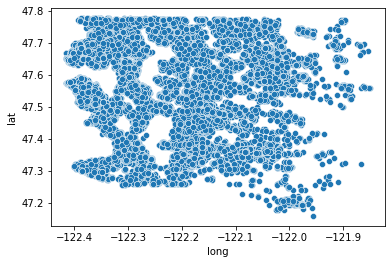

In [114]:
#plt.figure(figsize = (15,15))
sns.scatterplot(df['long'], df['lat'])

In [127]:
from sklearn.cluster import KMeans 

# AgglomerativeClustering was also tested as alternative to KMeans but was abandoned due to slowness

# creates 500 clusters using k-means clustering algorithm.
kmeans = KMeans(500)
clusters = kmeans.fit_predict(df[['lat','long']])
df['geo_cluster_k'] = kmeans.predict(df[['lat','long']])

In [116]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovation_cat,basement_size,geo_cluster_k
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,221900,not relevant,none,23
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,538000,distant,medium,73
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,180000,not relevant,none,64
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,604000,not relevant,large,223
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,510000,not relevant,none,52


In [117]:
#plt.figure(figsize = (15,8))
#sns.scatterplot(df['long'], df['lat'], df['pickup_cluster_ag'])

C:\Users\arnet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='long', ylabel='lat'>

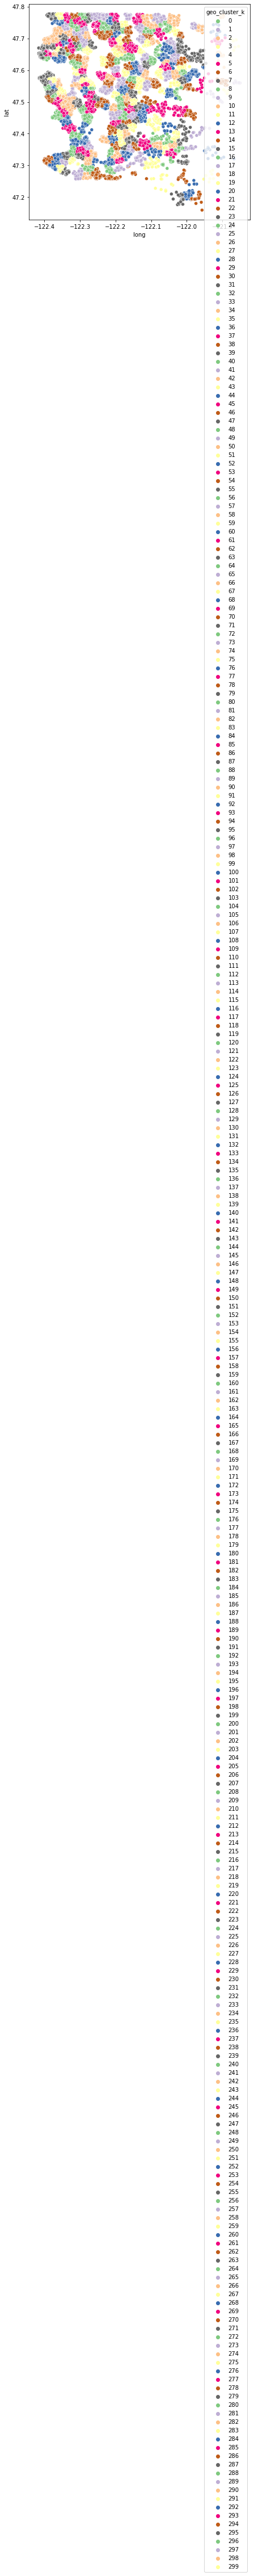

In [118]:
plt.figure(figsize = (7,7))
sns.scatterplot(df['long'], df['lat'], df['geo_cluster_k'], palette='Accent')

### Get address components

In [119]:
# Test geopy
from geopy.geocoders import Nominatim

# create the locator
geolocator = Nominatim(user_agent="myGeocoder")

# getting the location address
location = geolocator.reverse("47.5112, -122.257")
print(location)

# getting address compontent like street, city, state, country, country code, postalcode and so on.
print(location.raw.get('address').get('state'))
print(location.raw.get('address').get('city_district'))
print(location.raw.get('address').get('country'))
print(location.raw.get('address').get('postcode'))
print(location.raw.get('address').get('road'))
print(location.raw.get('address').get('house_number'))

10012, 61st Avenue South, Rainier Beach, Seattle, King County, Washington, 98178, United States
Washington
None
United States
98178
61st Avenue South
10012


In [120]:
df_addr = df.copy()

In [121]:
# The scatter mapbox is not showing, but this step is necessary in order to convert 'lat' and 'long' 
# to the desired format
import plotly_express as px
px.scatter_mapbox(df_addr, lat='lat', lon='long', zoom=15)

# Convert coordinates to format necessary for geopy
df_addr['coords'] = df_addr['lat'].map(str) +',' + df_addr['long'].map(str)
df_addr

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,renovation_cat,basement_size,geo_cluster_k,coords
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,221900,not relevant,none,23,"47.5112,-122.257"
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,538000,distant,medium,73,"47.721,-122.319"
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,180000,not relevant,none,64,"47.7379,-122.233"
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,604000,not relevant,large,223,"47.5208,-122.393"
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,510000,not relevant,none,52,"47.6168,-122.045"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20784,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,98103,47.6993,-122.346,1530,1509,360000,not relevant,none,167,"47.6993,-122.346"
20785,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,98146,47.5107,-122.362,1830,7200,400000,not relevant,none,197,"47.5107,-122.362"
20786,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,98144,47.5944,-122.299,1020,2007,402101,not relevant,none,245,"47.5944,-122.299"
20787,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,98027,47.5345,-122.069,1410,1287,400000,not relevant,none,163,"47.5345,-122.069"


In [122]:
# ATTENTION !!!!: TAKES VERY LONG (>1 HOUR)
'''from geopy.extra.rate_limiter import RateLimiter
locator = Nominatim(user_agent='myGeocoder', timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)'''

In [123]:
df_addr['address'] = df_addr['coords'].apply(rgeocode)

In [124]:
df_addr['house_number'], df_addr['coords'] = zip(*df_addr.address)

In [125]:
df_ad = df_addr['house_number'].str.split(',', expand=True)
df_addresses = pd.concat((df_addr, df_ad), axis=1)
df_addresses

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,0,1,2,3,4,5,6,7,8,9
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,10012,61st Avenue South,Rainier Beach,Seattle,King County,Washington,98178,United States,None,None
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,837,Northeast 127th Street,Northgate,Seattle,King County,Washington,98125,United States,None,None
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,15109,81st Avenue Northeast,Moorlands,Kenmore,King County,Washington,98028,United States,None,None
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,9236,Fauntleroy Way Southwest,Fauntleroy,Seattle,King County,Washington,98136,United States,None,None
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,923,221st Avenue Northeast,Sammamish,King County,Washington,98074,United States,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20784,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,927,North 97th Street,Licton Springs,Greenwood,Seattle,King County,Washington,98103,United States,None
20785,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2211,Southwest 103rd Place,White Center,Seattle,King County,Washington,98146,United States,None,None
20786,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,902,26th Avenue South,Leschi,Seattle,King County,Washington,98144,United States,None,None
20787,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,2136,Northwest Boulder Way Drive,Talus,Issaquah,King County,Washington,98027,United States,None,None


In [128]:
df_rev = df_addresses.drop([0, 3, 4, 5, 6, 7, 8, 9, 'coords', 'address', 'house_number'], axis= 1)
df_rev2 = df_rev.rename(columns={1: 'road', 2: 'town'})
df_rev2

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,price,renovation_cat,basement_size,geo_cluster_k,road,town
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,47.5112,-122.257,1340,5650,221900,not relevant,none,23,61st Avenue South,Rainier Beach
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,47.7210,-122.319,1690,7639,538000,distant,medium,73,Northeast 127th Street,Northgate
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,47.7379,-122.233,2720,8062,180000,not relevant,none,64,81st Avenue Northeast,Moorlands
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,47.5208,-122.393,1360,5000,604000,not relevant,large,223,Fauntleroy Way Southwest,Fauntleroy
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,47.6168,-122.045,1800,7503,510000,not relevant,none,52,221st Avenue Northeast,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20784,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,47.6993,-122.346,1530,1509,360000,not relevant,none,167,North 97th Street,Licton Springs
20785,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,47.5107,-122.362,1830,7200,400000,not relevant,none,197,Southwest 103rd Place,White Center
20786,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,47.5944,-122.299,1020,2007,402101,not relevant,none,245,26th Avenue South,Leschi
20787,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,47.5345,-122.069,1410,1287,400000,not relevant,none,163,Northwest Boulder Way Drive,Talus


In [129]:
df_rev2.to_csv('/Users/arnet/Desktop/Ironhack/Week5_Project/regression_data_exp.csv')